In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
miss = train.isna().sum().sort_values().reset_index()
miss.columns = ['column', 'total_miss']
percent = (train.isna().sum()/train.shape[0])*100
percent = percent.sort_values().reset_index()
percent.columns = ['column', 'percent_miss']
miss = pd.merge(left=miss, right=percent, on='column')
miss

,column,total_miss,percent_miss
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Name,0,0.000000
4,Sex,0,0.000000
5,SibSp,0,0.000000
6,Parch,0,0.000000
7,Ticket,0,0.000000
8,Fare,0,0.000000
9,Embarked,2,0.224467


In [7]:
miss = test.isna().sum().sort_values().reset_index()
miss.columns = ['column', 'total_miss']
percent = (test.isna().sum()/test.shape[0])*100
percent = percent.sort_values().reset_index()
percent.columns = ['column', 'percent_miss']
miss = pd.merge(left=miss, right=percent, on='column')
miss

,column,total_miss,percent_miss
0,PassengerId,0,0.000000
1,Pclass,0,0.000000
2,Name,0,0.000000
3,Sex,0,0.000000
4,SibSp,0,0.000000
5,Parch,0,0.000000
6,Ticket,0,0.000000
7,Embarked,0,0.000000
8,Fare,1,0.239234
9,Age,86,20.574163


In [8]:
test.Fare.fillna(test.Fare.mean(), inplace=True)

In [9]:
train.Embarked = train.Embarked.fillna(train['Embarked'].mode()[0])


In [10]:
train.Age.fillna(train.Age.median(), inplace = True)
train.Fare.fillna(train.Fare.median(), inplace = True)
test.Age.fillna(test.Age.median(), inplace = True)
test.Fare.fillna(test.Fare.median(), inplace = True)

In [11]:
train.drop('Cabin', axis = 1,inplace = True)
test.drop('Cabin', axis = 1,inplace = True)


In [12]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null

In [13]:
train['FamilySize'] = train['SibSp'] + train['Parch']+1
test['FamilySize'] = test['SibSp'] + test['Parch']+1

In [14]:
train['GenderClass'] = train.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)
test['GenderClass'] = test.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [15]:
train = pd.get_dummies(train, columns=['GenderClass','Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['GenderClass','Embarked'], drop_first=True)

In [16]:
train = train.drop(['Name','Ticket','Sex','SibSp','Parch'], axis = 1)
test = test.drop(['Name','Ticket','Sex','SibSp','Parch'], axis = 1)


Text(0.5, 1, 'Pair Plot')

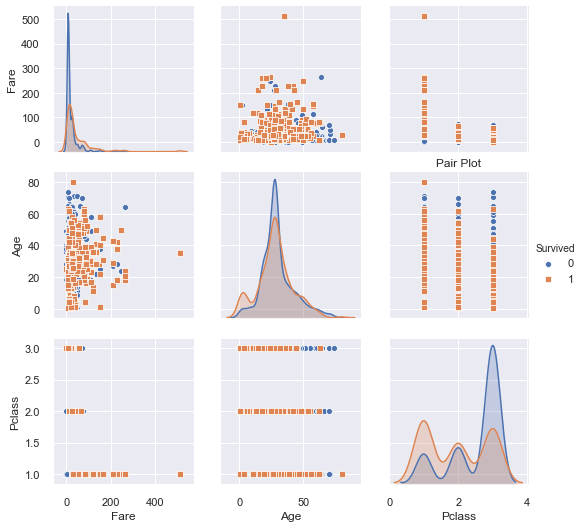

In [17]:
sns.pairplot(train[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1, 'Correlation between features')

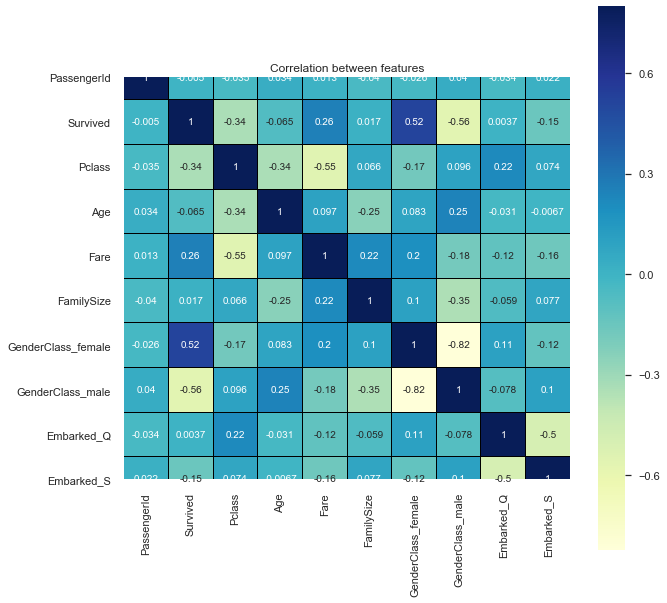

In [18]:
corr = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [19]:
X = train.loc[:,train.columns != 'Survived']
X.head()

,PassengerId,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,2,0,1,0,1
1,2,1,38.0,71.2833,2,1,0,0,0
2,3,3,26.0,7.9250,1,1,0,0,1
3,4,1,35.0,53.1000,2,1,0,0,1
4,5,3,35.0,8.0500,1,0,1,0,1


In [20]:
y = train.Survived 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [22]:
print(X_train.shape)
print(y_train.shape)

(712, 9)
(712,)


In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred_train = logreg.predict(X_train)  

In [25]:
y_pred_test = logreg.predict(X_test)                                                           # make predictions on the testing set

In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.7988826815642458


In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

    0   1
0  95  11
1  25  48


In [28]:
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  95                  11
Actual Survived              25                  48


In [29]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.7374301675977654


In [30]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

Accuracy score for test data is: 0.7486033519553073


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId           418 non-null int64
Pclass                418 non-null int64
Age                   418 non-null float64
Fare                  418 non-null float64
FamilySize            418 non-null int64
GenderClass_female    418 non-null uint8
GenderClass_male      418 non-null uint8
Embarked_Q            418 non-null uint8
Embarked_S            418 non-null uint8
dtypes: float64(2), int64(3), uint8(4)
memory usage: 18.1 KB


In [32]:
final_pred = logreg.predict(test)                                                           # make predictions on the testing set

In [33]:
PassengerId = test.PassengerId

In [34]:
final_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [35]:
temp = pd.DataFrame(pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": final_pred
    }))


temp.to_csv("submission1.csv", index = False)

In [37]:
submission = pd.read_csv('submission1.csv')

In [38]:
submission.shape

(418, 2)

In [39]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,1
6,898,1
7,899,0
8,900,1
9,901,0
